In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


# **Read and load data**

In [2]:
df = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# **Describe the Data**

In [3]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# **Check for missing values**

In [4]:
missing_values_count = df.isnull().sum()
missing_values_count[0:10]

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

**Therefore, there are no missing values**

# **Data Visualization**

Text(0.5, 1.0, 'Hours Studied vs. Performance Index')

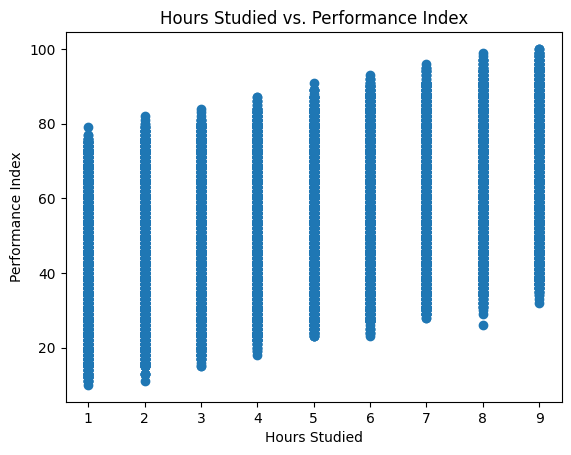

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours Studied'], df['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs. Performance Index')

**Inference:** As a student studies for more hours, they are more likely to perform better next time.

# **Data Preparation**

## **Convert categorical data to integer**

In [6]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [7]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## **Define y: The Target Variable**

In [8]:
y = df['Performance Index']
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

## **Define x: The Input features**

In [9]:
x = df.drop('Performance Index',axis = 1)
#axis = 1 drops y in the column but axis = 0 drops in row

x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


## **Data Splitting**

In [10]:
#spit to train/test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [11]:
x_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9254,5,49,0,7,5
1561,2,48,1,7,6
1670,2,81,0,7,2
6087,2,46,0,6,1
6669,8,47,0,9,0
...,...,...,...,...,...
5734,8,50,1,6,6
5191,4,68,0,9,3
5390,9,48,0,7,6
860,1,47,0,9,0


In [12]:
x_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6252,5,69,0,8,2
4684,2,46,1,4,8
1731,7,56,1,7,5
4742,6,42,1,8,5
4521,7,53,0,4,6
...,...,...,...,...,...
6412,2,70,0,7,3
8285,4,79,0,9,3
7853,2,40,1,7,2
1095,3,83,0,7,5


# **Model Building**

## **Linear Regression**

In [13]:
from sklearn.linear_model import LinearRegression

## **Training the model**

In [14]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

## **Applying the model to make a prediction**

In [15]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [16]:
y_lr_train_pred

array([34.47064278, 25.69665091, 57.88131903, ..., 45.05542174,
       21.02145642, 22.57711635])

In [17]:
y_lr_test_pred

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301])

## **Evaluate model performance**

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mean = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

lr_test_mean = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [19]:
print('LR Mean(Train):' , lr_train_mean)
print('LR R2(Train):' , lr_train_r2)
print('LR Mean(Test):' , lr_test_mean)
print('LR R2(Test):' , lr_test_r2)

LR Mean(Train): 4.169735849525007
LR R2(Train): 0.9886898790682355
LR Mean(Test): 4.082628398521853
LR R2(Test): 0.9889832909573145


## **Data Visualization of prediction results** 

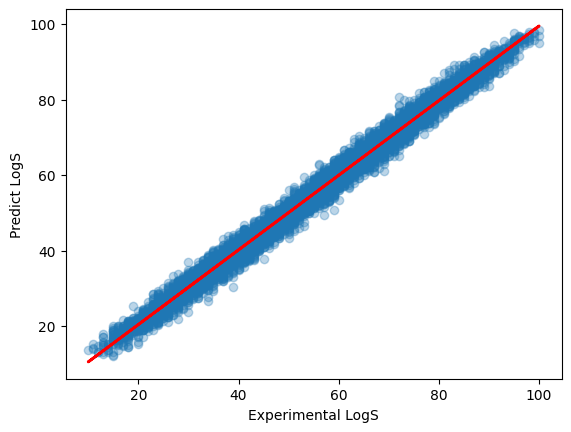

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x = y_train, y = y_lr_train_pred, alpha = 0.3)

coef = np.polyfit(y_train, y_lr_train_pred, 1)
poly1d_fn = np.poly1d(coef)

plt.plot(y_train, poly1d_fn(y_train), color='red', linewidth=2)

plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')
plt.show()

**The scatter diagram above shows the following:**
1. As actual values are increasing, predicted values are also increasing.
2. There is a good correlation between predicted and actual values.
3. The pedictive accuracy of the model is very good.
